In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, Dropout, BatchNormalization, Input,UpSampling1D
from tensorflow.keras.layers import concatenate, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D,LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# set directory
parent_dir = os.path.dirname(os.getcwd())

fo = os.path.join(parent_dir, 'data', 'Envisioned_Speech_Recognition', 'Digit')
os.chdir(parent_dir)
print("Updated Working Directory:", os.getcwd())

Updated Working Directory: c:\Users\ryoii\Desktop\EEG2IMAGE


In [3]:
from __00_load_edf import load_digits
from __01_transform_data import transform_eeg_data
from __02_model import train, visualize
from __01_transform_data import process_band

In [4]:
X, Y = load_digits(fo)
print(f'shape of X : {X.shape}')
print(f'shape of Y : {Y.shape}')

Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Digit\aashay_0.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Digit\aashay_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Digit\aashay_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Digit\aashay_3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Digit\aashay_4.edf...
EDF file detected
Setting channel info structure...
Creating ra

Shape of X_new : (36110, 32, 2)
Shape of Y_new : (36110,)
Epoch 1/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1191 - loss: 2.5457
Epoch 1: val_loss improved from inf to 2.31902, saving model to model/two_channel/model_digit_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.1192 - loss: 2.5444 - val_accuracy: 0.0983 - val_loss: 2.3190
Epoch 2/500
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1325 - loss: 2.3139
Epoch 2: val_loss did not improve from 2.31902
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.1325 - loss: 2.3138 - val_accuracy: 0.0907 - val_loss: 2.3675
Epoch 3/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1461 - loss: 2.2578
Epoch 3: val_loss did not improve from 2.31902
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.1462 - loss: 2.2577 - val_accuracy: 0.1123 - val_loss: 2.3711
Epoch 4/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1696 - loss: 2.2166
Epoch 4: val_loss did not impr

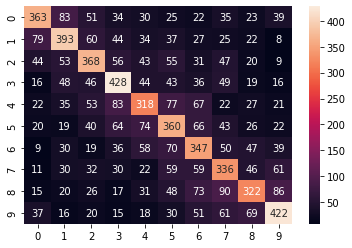

226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


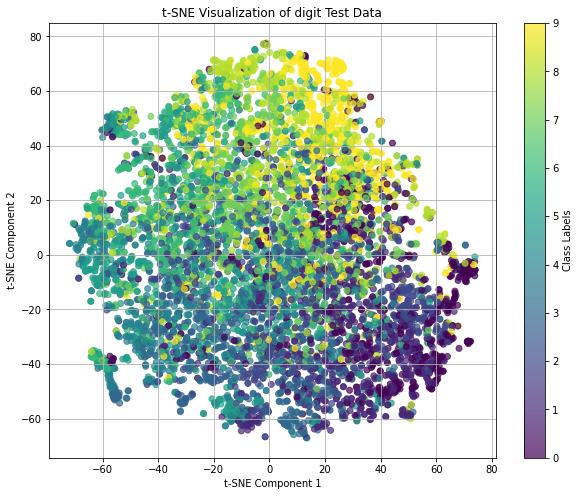

In [5]:
selected_channels = [4,9]
dataset_type = 'digit'
channels  = 'two_channel'
X_new, Y_new = transform_eeg_data(X, Y, selected_channels)

print(f'Shape of X_new : {X_new.shape}')
print(f'Shape of Y_new : {Y_new.shape}')

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

In [6]:
THETA = (4, 7)
ALPHA = (7, 15)
BETA = (15, 31)
GAMMA = (31, None)

Epoch 1/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1039 - loss: 2.5380
Epoch 1: val_loss improved from inf to 2.32117, saving model to model/two_channel/model_digit_THETA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.1039 - loss: 2.5367 - val_accuracy: 0.0928 - val_loss: 2.3212
Epoch 2/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1064 - loss: 2.3216
Epoch 2: val_loss did not improve from 2.32117
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.1064 - loss: 2.3215 - val_accuracy: 0.0976 - val_loss: 2.3521
Epoch 3/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1075 - loss: 2.3028
Epoch 3: val_loss improved from 2.32117 to 2.31822, saving model to model/two_channel/model_digit_THETA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.1076 - loss: 2.3028 - val_accuracy: 0.1002 - val_loss: 2.3182
Epoch 4/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1176 - loss: 2.2935
Epoch 4: val_loss did not improv

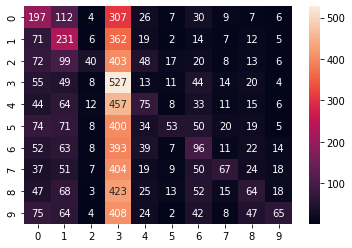

226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


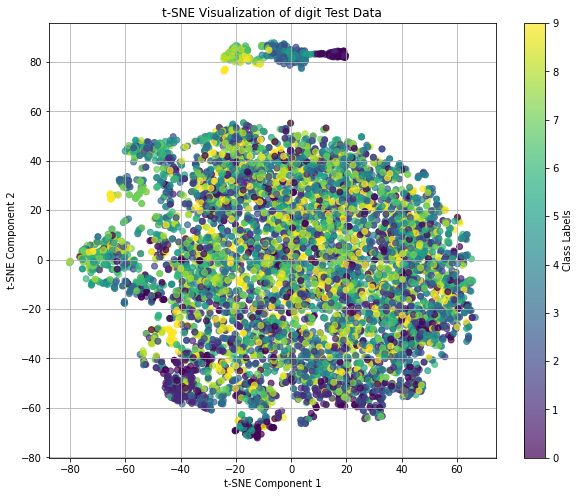

In [7]:
X_new, Y_new = process_band(X, Y, l_freq=THETA[0], h_freq=THETA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='THETA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

Epoch 1/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1055 - loss: 2.5473
Epoch 1: val_loss improved from inf to 2.31416, saving model to model/two_channel/model_digit_ALPHA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.1054 - loss: 2.5460 - val_accuracy: 0.1031 - val_loss: 2.3142
Epoch 2/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1055 - loss: 2.3221
Epoch 2: val_loss did not improve from 2.31416
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.1055 - loss: 2.3221 - val_accuracy: 0.0988 - val_loss: 2.3197
Epoch 3/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1148 - loss: 2.3055
Epoch 3: val_loss did not improve from 2.31416
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.1148 - loss: 2.3055 - val_accuracy: 0.0942 - val_loss: 2.3734
Epoch 4/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1186 - loss: 2.3010
Epoch 4: val_loss did not improve from 2.31416
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - acc

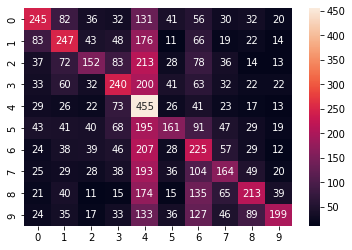

226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


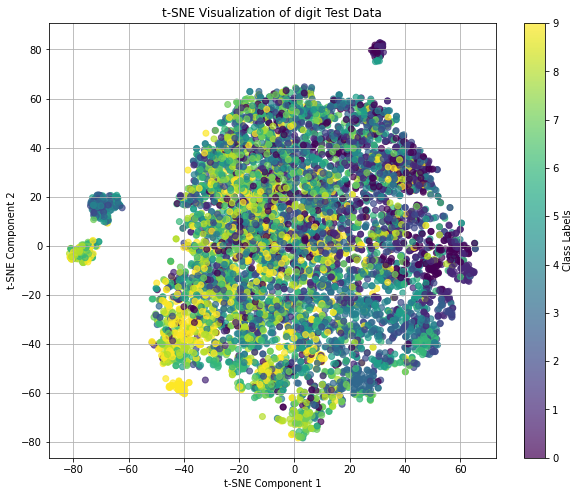

In [8]:
X_new, Y_new = process_band(X, Y, l_freq=ALPHA[0], h_freq=ALPHA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='ALPHA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

Epoch 1/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1044 - loss: 2.5639
Epoch 1: val_loss improved from inf to 2.31347, saving model to model/two_channel/model_digit_BETA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.1045 - loss: 2.5625 - val_accuracy: 0.1014 - val_loss: 2.3135
Epoch 2/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1183 - loss: 2.3227
Epoch 2: val_loss did not improve from 2.31347
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.1183 - loss: 2.3225 - val_accuracy: 0.0952 - val_loss: 2.3329
Epoch 3/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1496 - loss: 2.2648
Epoch 3: val_loss did not improve from 2.31347
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.1497 - loss: 2.2647 - val_accuracy: 0.1141 - val_loss: 2.3787
Epoch 4/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1723 - loss: 2.2144
Epoch 4: val_loss did not improve from 2.31347
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accu

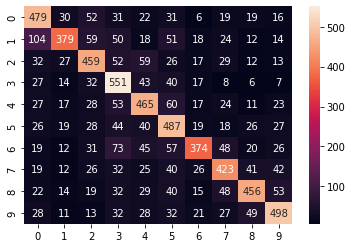

226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


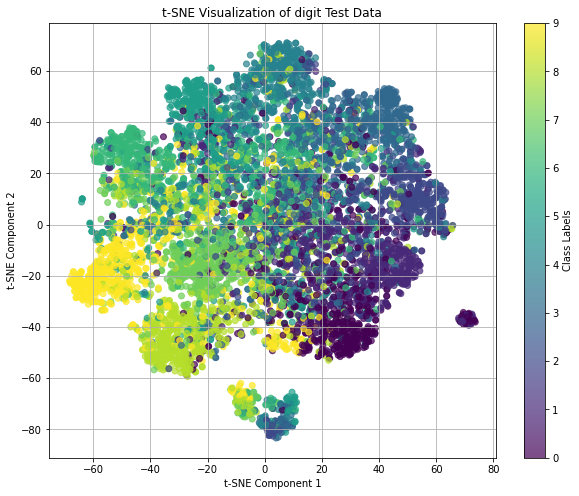

In [9]:
X_new, Y_new = process_band(X, Y, l_freq=BETA[0], h_freq=BETA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='BETA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

Epoch 1/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1127 - loss: 2.5397
Epoch 1: val_loss improved from inf to 2.31962, saving model to model/two_channel/model_digit_GAMMA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.1128 - loss: 2.5382 - val_accuracy: 0.1004 - val_loss: 2.3196
Epoch 2/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1516 - loss: 2.2436
Epoch 2: val_loss did not improve from 2.31962
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.1517 - loss: 2.2432 - val_accuracy: 0.0993 - val_loss: 2.3824
Epoch 3/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1933 - loss: 2.1006
Epoch 3: val_loss did not improve from 2.31962
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.1933 - loss: 2.1002 - val_accuracy: 0.1097 - val_loss: 2.5963
Epoch 4/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2314 - loss: 1.9701
Epoch 4: val_loss did not improve from 2.31962
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - acc

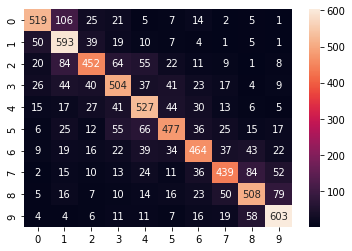

226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


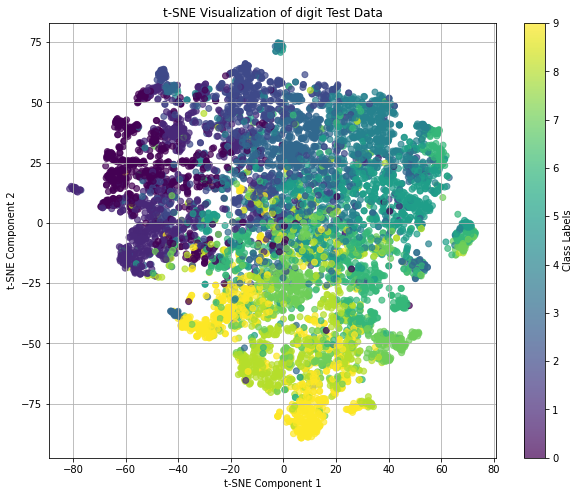

In [10]:
X_new, Y_new = process_band(X, Y, l_freq=GAMMA[0], h_freq=GAMMA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='GAMMA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)